# Integration of DataProfiler with Synthetic Data Generator

We want to use the DataProfiler to quantify all the characteristics of the real dataset. Then we use this information as parameters for Syntthetic Data to make a synthetic dataset that mimics the real dataset. Only dealing with numeric datasets for now.

The steps are:
1. Generate a profile report with the Real Dataset
   - enable the correlation matrix and disable any unnecessary calcs
2. Map the report into `synthetic_data.make_data_from_report` to generate the Synthetic Dataset
    - we now have a private dataset that mimics the real one
    - we can also tweak parameters or even add post processing
  
![Workflow Diagram!](https://i.imgur.com/FYW80xO_d.webp?maxwidth=760&fidelity=grand)

In [1]:
import dataprofiler as dp
import pandas as pd
import seaborn as sns

from synthetic_data.synthetic_data import make_data_from_report

## Generate DataProfiler Report

In [2]:
data_path = "data/iris.csv"

In [3]:
data = dp.Data(data_path)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


We must enable the correlation matrix. Also disabling the data labeler to avoid a performance hit.

In [4]:
profile_options = dp.ProfilerOptions()
profile_options.set({
    "data_labeler.is_enabled": False,
    "correlation.is_enabled": True,
})

profile = dp.Profiler(data, options=profile_options)

INFO:DataProfiler.profilers.profile_builder: Finding the Null values in the columns...  (with 5 processes)


  0%|          | 0/5 [00:00<?, ?it/s]/opt/miniconda3/envs/pipeline/lib/python3.8/site-packages/dataprofiler/profilers/profile_builder.py:514: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_series = df_series.loc[true_sample_list]
 20%|██        | 1/5 [00:01<00:07,  1.84s/it]/opt/miniconda3/envs/pipeline/lib/python3.8/site-packages/dataprofiler/profilers/profile_builder.py:514: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_series = df_series.loc[true_sample_list]
/opt/miniconda3/envs/pipeline/lib/python3.8/site-packages/dataprofiler/profilers/profile_builder.py:514: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_series = df_series.loc[true_sample_list]
/opt/miniconda3/envs/pipeline/lib/python3.8/site-packages/dataprofiler/profilers/profile_builder.py:514: FutureWarning: Passin

INFO:DataProfiler.profilers.profile_builder: Calculating the statistics...  (with 4 processes)


100%|██████████| 5/5 [00:01<00:00,  3.28it/s]


In [5]:
report = profile.report()
report

{'global_stats': {'samples_used': 150,
  'column_count': 5,
  'row_count': 150,
  'row_has_null_ratio': 0.0,
  'row_is_null_ratio': 0.0,
  'unique_row_ratio': 0.98,
  'duplicate_row_count': 3,
  'file_type': 'csv',
  'encoding': 'utf-8',
  'correlation_matrix': array([[ 1.        , -0.10936925,  0.87175416,  0.81795363,  0.78256123],
         [-0.10936925,  1.        , -0.4205161 , -0.35654409, -0.4194462 ],
         [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ,  0.94904254],
         [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ,  0.95646382],
         [ 0.78256123, -0.4194462 ,  0.94904254,  0.95646382,  1.        ]]),
  'chi2_matrix': array([[nan, nan, nan, nan, nan],
         [nan,  1., nan,  0.,  0.],
         [nan, nan, nan, nan, nan],
         [nan,  0., nan,  1.,  0.],
         [nan,  0., nan,  0.,  1.]]),
  'profile_schema': defaultdict(list,
              {'SepalLengthCm': [0],
               'SepalWidthCm': [1],
               'PetalLengthCm': [2],
             

In [6]:
x = make_data_from_report(report=report, seed=111)

Sorting the output by Species as the original dataset was also sorted this way. It will make the heatmaps make more sense.

In [7]:
x = x.sort_values(by="Species")
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
9,4.304371,3.106709,1.003445,0.146027,0.000000
19,4.683140,3.913173,1.000000,0.100000,0.071600
68,4.725276,3.017051,1.009278,0.112252,0.122362
119,4.369490,3.753865,1.001300,0.165817,0.144667
58,4.752307,3.360684,1.024744,0.290245,0.165224
...,...,...,...,...,...
73,7.721172,3.039561,6.899933,2.390860,1.932922
40,7.781235,3.671663,6.899881,2.454802,1.940698
84,7.626856,2.219682,6.899604,2.472143,1.965608
24,7.671806,2.660246,6.899980,2.452061,1.981706


<AxesSubplot:>

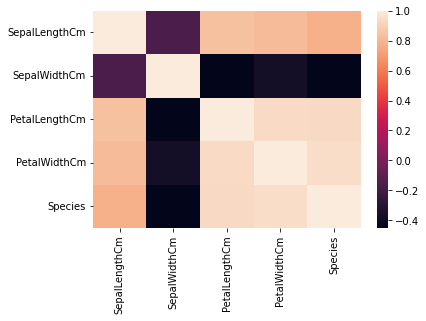

In [8]:
sns.heatmap(x.corr())

<AxesSubplot:>

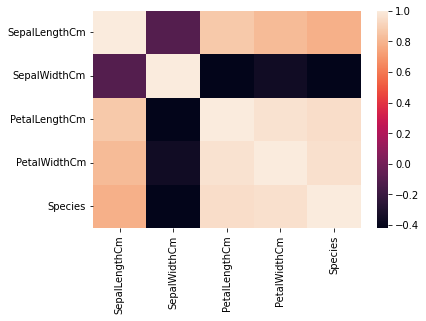

In [9]:
sns.heatmap(pd.read_csv(data_path).corr())

There's more work to be done with categorical variables, rounding, etc. but this is a start. Trying again below with a version of the dataset where I used one hot encoding instead.

In [10]:
data_path = "data/iris_one_hot.csv"

In [11]:
data = dp.Data(data_path)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Setosa,Versicolor,Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


We must enable the correlation matrix. Also disabling the data labeler to avoid a performance hit.

In [12]:
profile_options = dp.ProfilerOptions()
profile_options.set({
    "data_labeler.is_enabled": False,
    "correlation.is_enabled": True,
})

profile = dp.Profiler(data, options=profile_options)

report = profile.report()

INFO:DataProfiler.profilers.profile_builder: Finding the Null values in the columns...  (with 7 processes)


  0%|          | 0/7 [00:00<?, ?it/s]/opt/miniconda3/envs/pipeline/lib/python3.8/site-packages/dataprofiler/profilers/profile_builder.py:514: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_series = df_series.loc[true_sample_list]
/opt/miniconda3/envs/pipeline/lib/python3.8/site-packages/dataprofiler/profilers/profile_builder.py:514: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_series = df_series.loc[true_sample_list]
/opt/miniconda3/envs/pipeline/lib/python3.8/site-packages/dataprofiler/profilers/profile_builder.py:514: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_series = df_series.loc[true_sample_list]
/opt/miniconda3/envs/pipeline/lib/python3.8/site-packages/dataprofiler/profilers/profile_builder.py:514: FutureWarning: Passing a set as an indexer is deprecated and will 

INFO:DataProfiler.profilers.profile_builder: Calculating the statistics...  (with 4 processes)


100%|██████████| 7/7 [00:01<00:00,  4.70it/s]


In [13]:
x = make_data_from_report(report=report, seed=111)

In [14]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Setosa,Versicolor,Virginica
0,7.554216,3.216717,6.732387,2.040503,0.228187,0.729227,0.510783
1,6.217846,2.925077,5.295838,1.734387,0.494068,0.224169,0.728855
2,7.296879,3.081097,6.722613,1.781851,0.284985,0.522338,0.653300
3,6.391085,3.350297,4.349478,1.256508,0.614093,0.229484,0.610057
4,6.457627,2.736418,5.202507,1.526715,0.263369,1.000000,0.126927
...,...,...,...,...,...,...,...
145,5.281110,3.495529,1.096229,0.381242,0.683955,0.750608,0.090154
146,5.760774,2.734644,3.074666,1.014741,0.471411,0.672671,0.323511
147,4.660295,3.417431,1.007764,0.301348,0.778581,0.443879,0.232683
148,5.444802,3.052134,4.577864,1.600859,0.429627,0.354461,0.665405


<AxesSubplot:>

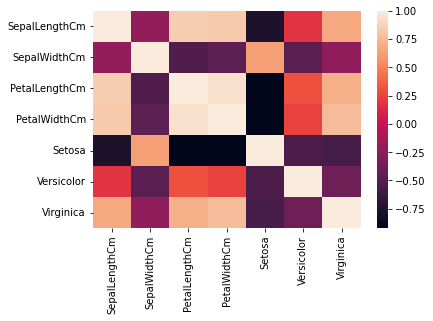

In [15]:
sns.heatmap(x.corr())

<AxesSubplot:>

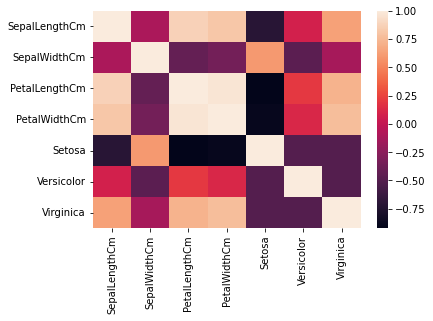

In [16]:
sns.heatmap(pd.read_csv(data_path).corr())

There's still the issue with the categorical (discrete) variables turning into continous ones. I'll try rounding them off to the same decimal place as the original dataset...